### Project 3: Build a timeseries model for forecasting number of customers of a particular store

  One of the leading retail stores in the US, ABC, would like to predict the customers and demand accurately. There are certain events and holidays which impact sales on each day. There are customers data available for 51 stores of ABC. The business is facing a challenge due to unforeseen demands and runs out of stock sometimes, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like promotions, state and school holidays conditions.
ABC runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. Part of the challenge presented by this competition is modelling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical data for 51 stores located in different regions are availab
le.
The dataset contains 51 stores’ customers data along with other details like day of the week, store id, promotion and holidays details  from Jan 2014 to2016.


### Data Dictionary


**Date** : Date 

**Store**:Store id

**Day of Week**: Day of the week (encoded):  
1: Sunday 2: Monday… 7: Saturday 

**Customers**: Number of customers on a given day 

**Open** : An indicator for whether the store is open:  
0: Close; 1: Open 

**Promotion**: An Indicator whether a store is running a promotion on given day. 
0: No Promotion; 1: Promotion 

**State Holiday**: Indicates a state holiday; Normally all stores, with few exceptions, are closed on state holidays.  
0: No state holiday; ‘a’, ’b, ’c’: different types of holidays 

**School Holiday**: An indicator if the (Store, Date) was affected by the closure of public schools 

#### Holiday Events
 - **Super Bowl:** Feb month 
 - **Labour Day:** Sept month
 - **Thanksgiving:** Nov month
 - **Christmas:** December month

**Initial Guidelines:**
1. Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2. Create GitHub account and submit the GitHub link.


### Software Engineering aspect:  

Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.

### General Instructions

- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- Before submitting the assessment, there should be `no error` while executing the notebook. If there are any error causing code, please comment it.
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

#### **Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.**

### Loading required libraries and packages 

Import various libraries and modules used in data analysis, machine learning, and visualization tasks in Python such as `pandas`, `numpy`, `sklearn`, `matplotlib`, `datetime` , `timeit`, `seaborn`, `statsmodels`,`statsmodels.tsa.arima.model` `statsmodels.tsa.stattools`,`statsmodels.api` , `sklearn.model_selection`, `sklearn.linear_model`, `sklearn.metrics`, `sklearn.preprocessing`. There are 2 ways to import the libraries and modules:

- import numpy as np
- from sklearn.model_selection import train_test_split

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###  Task 1 : Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights-  (weightage - 25 marks)

#### T1.1: Load the dataset making ‘Date’ as time stamp and index using try and except blocks.                   (weightage - 2 marks) (AE)

##### Note: 
- The read_excel method in Pandas allows you to read Excel files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.
- Add parse_dates = True and index_col = 'Date' while loading the df since we are using timeseries data
- Do not use PRINT statement inside the Except Block. Please use `return` statement only
- `Store50` variable is defined to store the dataframe
- The statement `return Store50` should return the dataframe.

In [3]:
def load_the_dataset(dataset_location):
    Store50 = None
    try:
        #load data set
        Store50 = pd.read_excel(dataset_location, parse_dates = True, index_col = 'Date')
        return Store50
    except :
        return "File not found. Please check the file"

In [4]:
# store the result of the dataset
dataset_location = "store50.xlsx"
Store50=load_the_dataset(dataset_location)
Store50.head()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday
Date,,,,,,,
2016-01-01,1036.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-01,1027.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-01,1004.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-01,1014.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-02,1044.0,7.0,0.0,0.0,0.0,0,0.0


#### T1.2:  Find the number of unique stores                     (weightage - 2 marks) (AE)

##### Note: 

- The function `unique_store` should retrieve the number of unique values of the `Store` column from the DataFrame Store50.
- Extract the `Store` column from the DataFrame **Store50** and then apply the unique() method to it and store it in the defined variable `uniq`.
- The unique() method returns an array of unique values present in the 'Store' column. 
- The statement `return len(uniq)` returns an integer of number of unique store values are there in the 'Store' column.

In [17]:
## List the number of unique stores for which we have the data?
def unique_store(Store50):
    uniq = None
    
    #find the number of stores
    uniq = Store50['Store'].unique()
    
    # code ends here
    return len(uniq)

In [19]:
unique_store(Store50)

52

#### T1.3 Find the number of observations for each store?     (weightage - 2 marks) (AE)

##### Note :
- The function `no_obs_store` should return the number of observations for each store stored together in the form of a dictionary
- Retrieve the unique values of the 'Store' column from the DataFrame Store50.
- Extract the 'Store' column from the DataFrame Store50 and then applies the unique() method to it. 
- Iterate over each unique store value using a for loop and get the number of observations and store it in the dictionary `store_counts`
- Example for key value pair **{1036.0: 852}** where 1036.0 is Store value and 852 is the number of observations.


In [20]:
def no_obs_store(Store50):
    store_counts = {}
    
    #get the unique values of the store column
    unique_stores = Store50['Store'].unique()
    
    # Iterate over each unique store value
    for store in unique_stores:
        
        store_observations = Store50[Store50['Store'] == store]
        
        # Store the len of observations in the dictionary
        store_counts[store] = len(store_observations)

    #code ends here
    return store_counts

In [21]:
no_obs_store(Store50)

{1036.0: 852,
 1027.0: 852,
 1004.0: 852,
 1014.0: 852,
 1044.0: 852,
 1041.0: 852,
 1047.0: 852,
 1012.0: 852,
 1037.0: 668,
 1005.0: 852,
 1011.0: 852,
 1043.0: 852,
 1001.0: 668,
 1048.0: 852,
 1030.0: 852,
 1035.0: 852,
 1013.0: 852,
 1029.0: 852,
 1042.0: 852,
 1017.0: 668,
 1032.0: 852,
 1024.0: 852,
 1006.0: 668,
 1007.0: 852,
 1002.0: 668,
 1019.0: 852,
 1000.0: 668,
 1009.0: 852,
 1023.0: 668,
 1016.0: 852,
 1050.0: 852,
 1031.0: 852,
 1010.0: 852,
 1034.0: 852,
 1039.0: 852,
 1033.0: 852,
 1045.0: 852,
 1015.0: 852,
 1022.0: 852,
 1040.0: 852,
 1046.0: 852,
 1021.0: 852,
 1028.0: 852,
 1008.0: 852,
 1025.0: 668,
 1020.0: 852,
 1038.0: 668,
 1003.0: 852,
 1018.0: 852,
 1026.0: 852,
 1049.0: 852,
 nan: 0}

#### T1.4: Find the list of store ids which are having less number of observations compared to other stores?                                        (weightage - 2 marks) (AE)
##### Note:
- The function `less_obs_stores` should return the list of store ids which are having number of observations less than 852.
- Extract the `Store` column from the DataFrame Store50 and then applies the unique() method to it
- Iterate over each unique store value using a for loop and get the number of observations less than 852 and append it in the list `less_obs_stores_list`.

##### HINT: Highest number of observations is 852, print all stores ids having number of observations less than 852 

In [24]:
def less_obs_stores(Store50):
    less_obs_stores_list = []
    
    #get the unique values of the store column
    unique_stores = Store50['Store'].unique()
    
    # Iterate over each unique store value
    for store in unique_stores:
        
        store_observations = Store50[Store50['Store'] == store]
        
        # count the observations per each store 
        count_observations = len(store_observations)
        
        if count_observations < 852:
            less_obs_stores_list.append(store)   

    # code ends here
    return less_obs_stores_list

In [25]:
less_obs_stores(Store50)

[1037.0, 1001.0, 1017.0, 1006.0, 1002.0, 1000.0, 1023.0, 1025.0, 1038.0, nan]

#### T1.5: Find the average number of customers for the given store ids:1041, 1044?  (weightage - 4 marks) (AE)

##### Note: 
- The function `avg_cust_store` should return the average number of customers for two specific stores (Store 1044 and Store 1041) within the Store50 DataFrame.
- Sort the data in ascending order, calculate the mean customer count for both stores and store them in the variables mean_1044 and mean_1041 respectively. 
- Use the variable `mean_1044` and `mean_1041` to store the mean values of Store 1044 and Store 1041.


In [32]:
# Here, we are also reversing the data as we need to contiguous data in the ascending order for a Time Series Analysis.
def avg_cust_store(Store50):
    mean_1041 , mean_1044 = None, None
    
    #sort the data
    sort_Store50 = Store50.sort_index(ascending = True)
    
    #filter the data for each store id
    store_1041 = sort_Store50[sort_Store50['Store'] == 1041]
    store_1044 = sort_Store50[sort_Store50['Store'] == 1044]
    
    #compute the mean and round to nearest integer
    mean_1041 = round(store_1041['Customers'].mean())
    mean_1044 = round(store_1044['Customers'].mean())
    
    # code ends here
    return mean_1044 , mean_1041

In [35]:
Store50[Store50['Store'] == 1041].sort_index()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday
Date,,,,,,,
2014-01-01,1041.0,2.0,0.0,0.0,0.0,a,1.0
2014-01-02,1041.0,5.0,742.0,1.0,0.0,0,0.0
2014-01-03,1041.0,5.0,864.0,1.0,0.0,0,0.0
2014-01-04,1041.0,1.0,0.0,0.0,0.0,b,1.0
2014-01-05,1041.0,3.0,0.0,0.0,1.0,a,0.0
...,...,...,...,...,...,...,...
2016-06-01,1041.0,2.0,0.0,0.0,1.0,a,0.0
2016-06-02,1041.0,5.0,918.0,1.0,1.0,0,0.0
2016-06-03,1041.0,6.0,651.0,1.0,0.0,0,0.0


In [33]:
avg_cust_store(Store50)

(474, 700)

#### T1.6: Draw the time series plot (using pandas only) on weekly aggregation (by resampling method) of number of customers for the Store ids 1041 & 1044?       (weightage - 4 marks) (ME)

##### Note:(regarding the function time_series_plot)
- The function `time_series_plot` should return a dataframe `df` where it stores the data of number of customers per each date availble in the dataset for Store id 1044 and Store id 1041.
- Sort the data in ascending order for store 1044 and store 1041 from the `Store50` DataFrame .
- Combines this filtered data into a new DataFrame named `df` with both the columns with names `Store_1041` and `Store_1044` and structure it with columns for each store's `Customers` data.
- Format of the dataframe returned

|            | Store\_1041 | Store\_1044 |
|------------|-------------|-------------|
|Date        |             |             |
| 2014-01-01 | 0.0         | 0.0         |



In [38]:
def time_series_plot(Store50):
    df = None
    # code starts here
    
    #sort the data
    sort_Store50 = Store50.sort_index(ascending = True)
    
    #filter the data for each store id
    store_1041_cust_info = sort_Store50[sort_Store50['Store'] == 1041]["Customers"]
    store_1044_cust_info = sort_Store50[sort_Store50['Store'] == 1044]["Customers"]
    
    #aggregate the weekly data
    store_1041_weekly_agg = store_1041_cust_info.resample('W').sum()
    store_1044_weekly_agg = store_1044_cust_info.resample('W').sum()
    
    #create a dataframe
    df = pd.DataFrame({'Store_1041': store_1041_weekly_agg, 'Store_1044': store_1044_weekly_agg})

    # code ends here
    return df

In [39]:
df = time_series_plot(Store50)
print(df)

            Store_1041  Store_1044
Date                              
2014-01-05      1606.0       956.0
2014-01-12      3439.0      2263.0
2014-01-19      4199.0      2412.0
2014-01-26      4937.0      2789.0
2014-02-02      4437.0      2656.0
...                ...         ...
2016-05-08      2809.0      1954.0
2016-05-15      1561.0      1321.0
2016-05-22      5594.0      4182.0
2016-05-29      3924.0      3104.0
2016-06-05      4527.0      4208.0

[127 rows x 2 columns]


##### Note: The 'Customers' variable is our desired Time Series. So let us plot it to understand how the series looks like. This is a daily series.

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

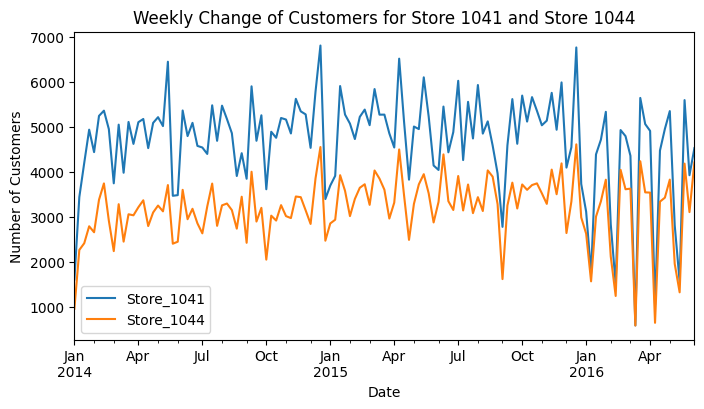

In [48]:
## Resample the data into a weekly time series to understand how the number of customers change weekly.
df.plot(figsize=(8, 4))
plt.title("Weekly Change of Customers for Store 1041 and Store 1044")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

#### T1.7: Draw the time series plot (using pandas only) on monthly aggregation (by resampling method) of number of customers for the Store ids 1041 & 1044?   (weightage - 2 marks) (ME)

##### Note: Use the dataframe `df` combined in the above cell to plot the time series plot.

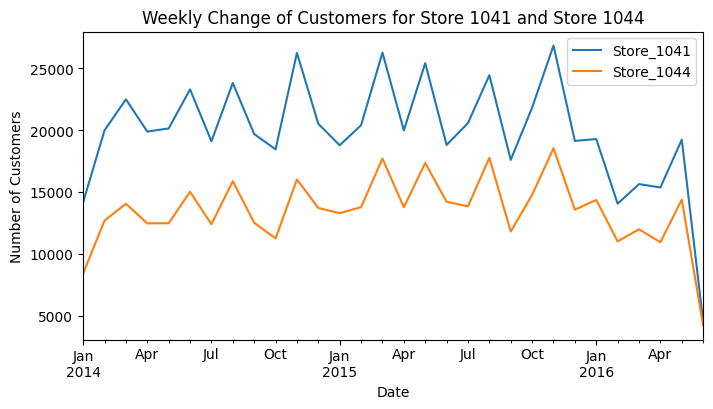

In [49]:
## Resample the data into a monthly time series to understand how the number of the customers change monthy?
#using the df on a monthly aggregation
df.resample('M').sum().plot(figsize=(8, 4))
plt.title("Weekly Change of Customers for Store 1041 and Store 1044")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

#### T1.8: Which store id dominates(out of 1041 & 1044) in both weekly and monthly customers aggregation?      (weightage - 2 marks) (AE)  

##### Note: 
- There are two functions, first function `store_id_max_weekly` for weekly customers aggregation and second function `store_id_max_monthly` for monthly customers aggregation
##### HINT - Get the aggregration based on average and return the store ID in the format given below. The output should be in this format `Store_####`

In [52]:
def store_id_max_weekly(df):
    max_id = None
    # code starts here
    
    # use the previous dataframe
    if df['Store_1041'].mean() > df['Store_1044'].mean():
        max_id = "Store_1041"
    else:
        max_id = "Store_1044"
    
    # code ends here
    return max_id

In [53]:
store_id_max_weekly(df)

'Store_1041'

In [54]:
def store_id_max_monthly(df):
    max_id =  None
    # code starts here
    
    #resample the data to monthly and take aggregation
    monthly_agg = df.resample('M').sum()
    
    # use the previous dataframe
    if monthly_agg['Store_1041'].mean() > monthly_agg['Store_1044'].mean():
        max_id = "Store_1041"
    else:
        max_id = "Store_1044"

    # code ends here
    return max_id

In [55]:
store_id_max_monthly(df)

'Store_1041'

#### T1.9: Save the dataset (weekly aggregated data related to number of customers for store id 1041 & 1044 in csv file as ‘weekly_1041.csv’ and ‘weekly_1044.csv’ ) in your GitHub repository for model building process. (This task is for maintaining the version control of datasets)                  (weightage - 1 mark) (ME)

#### Refer to the Github document from Lumen to create the repository and steps to commit 
#### Add your Github repository link below 

##### Note: 
- The function `weekly_1041` will return the weekly sum for store id 1041.
- Use the method `resample()` to calculate the weekly sum for the dataframe `df` and drop the Store_1044 to get the dataframe for weekly 1041.Use axis=1, inplace=True
- Store the dataframe in the variable `df_weekly_1041`


In [ ]:
# weekly sum for store_1044
def weekly_1041(df):
    df_weekly_1041 =  None
    #code starts here

    # code ends here
    return df_weekly_1041

In [ ]:
df_weekly_1041 = weekly_1041(df)

##### Note:
- The function `weekly_1044` will return the weekly sum for store id 1041.
- Use the method `resample()` to calculate the weekly sum for the dataframe `df` and drop the Store_1041 to get the dataframe for weekly 1044.Use axis=1, inplace=True
- Store the dataframe in the variable `df_weekly_1044`

In [ ]:
def weekly_1044(df):
    df_weekly_1044 = None
    #code starts here

    # code ends here
    return df_weekly_1044

In [ ]:
df_weekly_1044 = weekly_1044(df)

##### Save them into CSV files

In [ ]:
# save the into csv file

## Task 2: Building forecasting models and metrics evaluation. (weightage - 50 Marks) 

#### T2.1: Use the weekly_1041 and weekly_1044 data and Conduct stationarity test(ADF) for both weekly aggregated data(1041 &1044) ?  (weightage - 10 Marks) (AE and ME)
Are they both exhibit stationary? State your results of the Augmented Dicky Fuller(ADF) test

Print your output in the given format :

**Data is stationary       
Data is not stationary**

##### Note:
- Function `adf_test` should be designed for analyzing time series data using the Augmented Dickey-Fuller (ADF) test, a statistical test used to determine if a time series is stationary or not. 
- Utilize rolling statistics and the Augmented Dickey-Fuller (ADF) test to analyze time series data(rolling mean and standard deviation with a window size of 7).
- Plot the original time series along with rolling statistics, and perform the ADF test to check if the value is less than or equal to `0.05` then return `data is stationary` or else return the `data is non-stationary` 


**Checking for stationarity of data using ADF test function:**

In [ ]:
## Defning a function
def adf_test(timeseries):
    # code starts here

    # code ends here
    return 

In [ ]:
adf_test(df_weekly_1041)

In [ ]:
adf_test(df_weekly_1044)

##### Series is stationary and hence no need for differentiation.

#### T2.2 :Split the data into train and test (consider  2016 year  for test data)                                   (weightage - 5 Marks) (AE)
##### Perform the split for store 1041 data and store 1044 separately and return the train_1041, test_1041 and train_1044,test_1044

##### Note: 
- The function `train_test_split_1041` should be designed to split the time series data `df_weekly_1041` into training and testing sets. 
- Specifically, it should separate the data for the year 2016 to be used as the test set, while all other years are used for training. 
- Similarly, the function `train_test_split_1044` should be designed to split the time series data `df_weekly_1044` into training and testing sets. 
- It should also separate the data for the year 2016 to be used as the test set.\
- Use the variable that are declared in the function to store the training data and testing data respectively.

In [ ]:
def train_test_split_1041(df_weekly_1041):# Split the data into train and test ( consider year 2016 for test data) 
    train_1041,test_1041 = None, None
    #code starts here

    # code ends here
    return train_1041,test_1041


In [ ]:
train_1041=train_test_split_1041(df_weekly_1041)[0]
test_1041=train_test_split_1041(df_weekly_1041)[1]

In [ ]:
def train_test_split_1044(df_weekly_1044):# Split the data into train and test ( consider year 2016 for test data) 
    train_1044,test_1044 = None,None
    # code starts here

    # code ends here
    return train_1044,test_1044


In [ ]:
train_1044=train_test_split_1044(df_weekly_1044)[0]
test_1044=train_test_split_1044(df_weekly_1044)[1]

#### T2.3: Draw the ACF and PACF plot for the above train data for both the stores (1041 and 1044) (weightage - 6 Marks) (ME)
##### Note: Use figsize = (12,8) ,lags = 20 and ax = plt.gca()

In [ ]:
## Auto correlation plot for weekly aggregation data of Store 1041


In [ ]:
## Auto correlation plot for weekly aggregation data of Store 1044


In [ ]:
## Partial Auto correlation plot for weekly aggregation data of Store 1041


In [ ]:
## Partial Auto correlation plot for weekly aggregation data of Store 1044


#### Task 2.4: Find the best p.d q values for ARIMA model based on least AIC values  (weightage - 6 Marks) (ME)

##### Note :ARIMA
 - Set up a grid search for p, d, and q parameters using `itertools.product`
 - Augment parameters with seasonality (e.g., 7 for weekly data).
 - print parameter combinations as below
 - Example - Model: (0, 0, 1)(0, 0, 1, 7)

##### Note: Create an empty DataFrame (ARIMA_AIC) to store results with columns `param` and `AIC`

##### Note :
- Create a loop through parameter combinations:
- Fit ARIMA models using training data.
- Calculate AIC values for each model.
- Store parameter combination and AIC value in ARIMA_AIC.
-  Display or analyze results in ARIMA_AIC.

#### Task 2.5: Build the best ARIMA and SARIMA model based on the best p,d q values for store 1041 and make predictions  (weightage - 10 Marks) (ME)

##### HINTS :
 - Fit the ARIMA and SARIMA model for store 1041 
 - Plot comparing both the model predictions 

##### ARIMA Model

#### SARIMA model 

##### Plot the test_1041

#### T2.6 : Perform Model evaluation and print various evaluation metrics (MSE, RMSE, MAE, MAPE) (weightage - 6 Marks) (ME) 
##### Note:Prepare the function timeseries_evaluation_metrics_func in a way that it will take inputs for ARIMA Model test_1041['Store_1041'],pred_1041 , and for SARIMA Model test_1041['Store_1041'], pred_sarima_1041 which will print the following values 
 - Mean Squared Error
 - Root Mean Squared Error 
 - Mean Absolute Error 
 - Mean Absolute Percentage Error 

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    # code starts here

    # code ends here

    return 

**Evaluation metrics for ARIMA model**

In [ ]:
timeseries_evaluation_metrics_func(test_1041['Store_1041'],pred_1041)

**Evaluation metrics for SARIMA model**

In [ ]:
timeseries_evaluation_metrics_func(test_1041['Store_1041'], pred_sarima_1041)

#### T2.7 : Save the initial version of ARIMA model as “ARIMA_Model_Storeid” and “SARIMA_Model_Storeid” to a version controlsystem GitHub using git commands for collaboration, tracking and ensuring transparency in model development.  (weightage - 2 Marks) (ME)

#### T2.8 : Model Explainability - Using Lime/SHAP libraries, explain the prediction of your time series model and give inferences.   (weightage – 5 marks)(ME)

## Task 3: Model Deployment: Deploy the trained model into a production environment, allowing stakeholders to utilize it for real-time forecasting Develop an intuitive user interface to facilitate easy interaction with the model. (weightage – 10 marks) 

#### T3.1 Model deployment step (saving the file as a .t5 model)      (weightage – 2 marks)(ME)

#### T3.2 Implement the unit test cases and use the saved .t5 model file to create a webapp using flask/streamlit code    (weightage – 8 marks)(ME)

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 15 marks) (ME)

**Final Submission guidelines:**
- Download the Jupyter notebook in the format of html. 
- Upload it in the lumen (UNext LMS)
- Take a screenshot of T3.2 (Deployment) and upload it in the lumen (UNext LMS)
- Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS)

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------